# Lab: Temperature measurements
### 9.17.18   |   Jonathan Kelley   |  ISIM



In this lab, we will make measurements of temperature by making a thermistor circuit. 


$R = 1000 \Omega \cdot e^{-3528 \left ( \frac{1}{298}  - \frac{1}{T} \right )}$


where R is the resistance of the circuit and T is the temperature (in Kelvin) of the environment of the thermistor. We can rearrange this relationship to better suit our needs of measuring temperature as a function of measured resistance:

$T = \left ( \frac{1}{298} + \frac{ \ln{ \frac{ R }{ 1000}}}{ 3528 }  \right )^{-1}$

This relationship follow an inverse relationship with an asymptote at 0 ohm resistance. 

In [1]:
# Library imports
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Image

%matplotlib inline

### Expressing our function pythonically:

In [2]:
def T(R):
    return 1/(1/298 + np.log(R / 1000) / 3528)

### Plotting the relationship:

Text(1200,500,'Room Temperature (298K)')

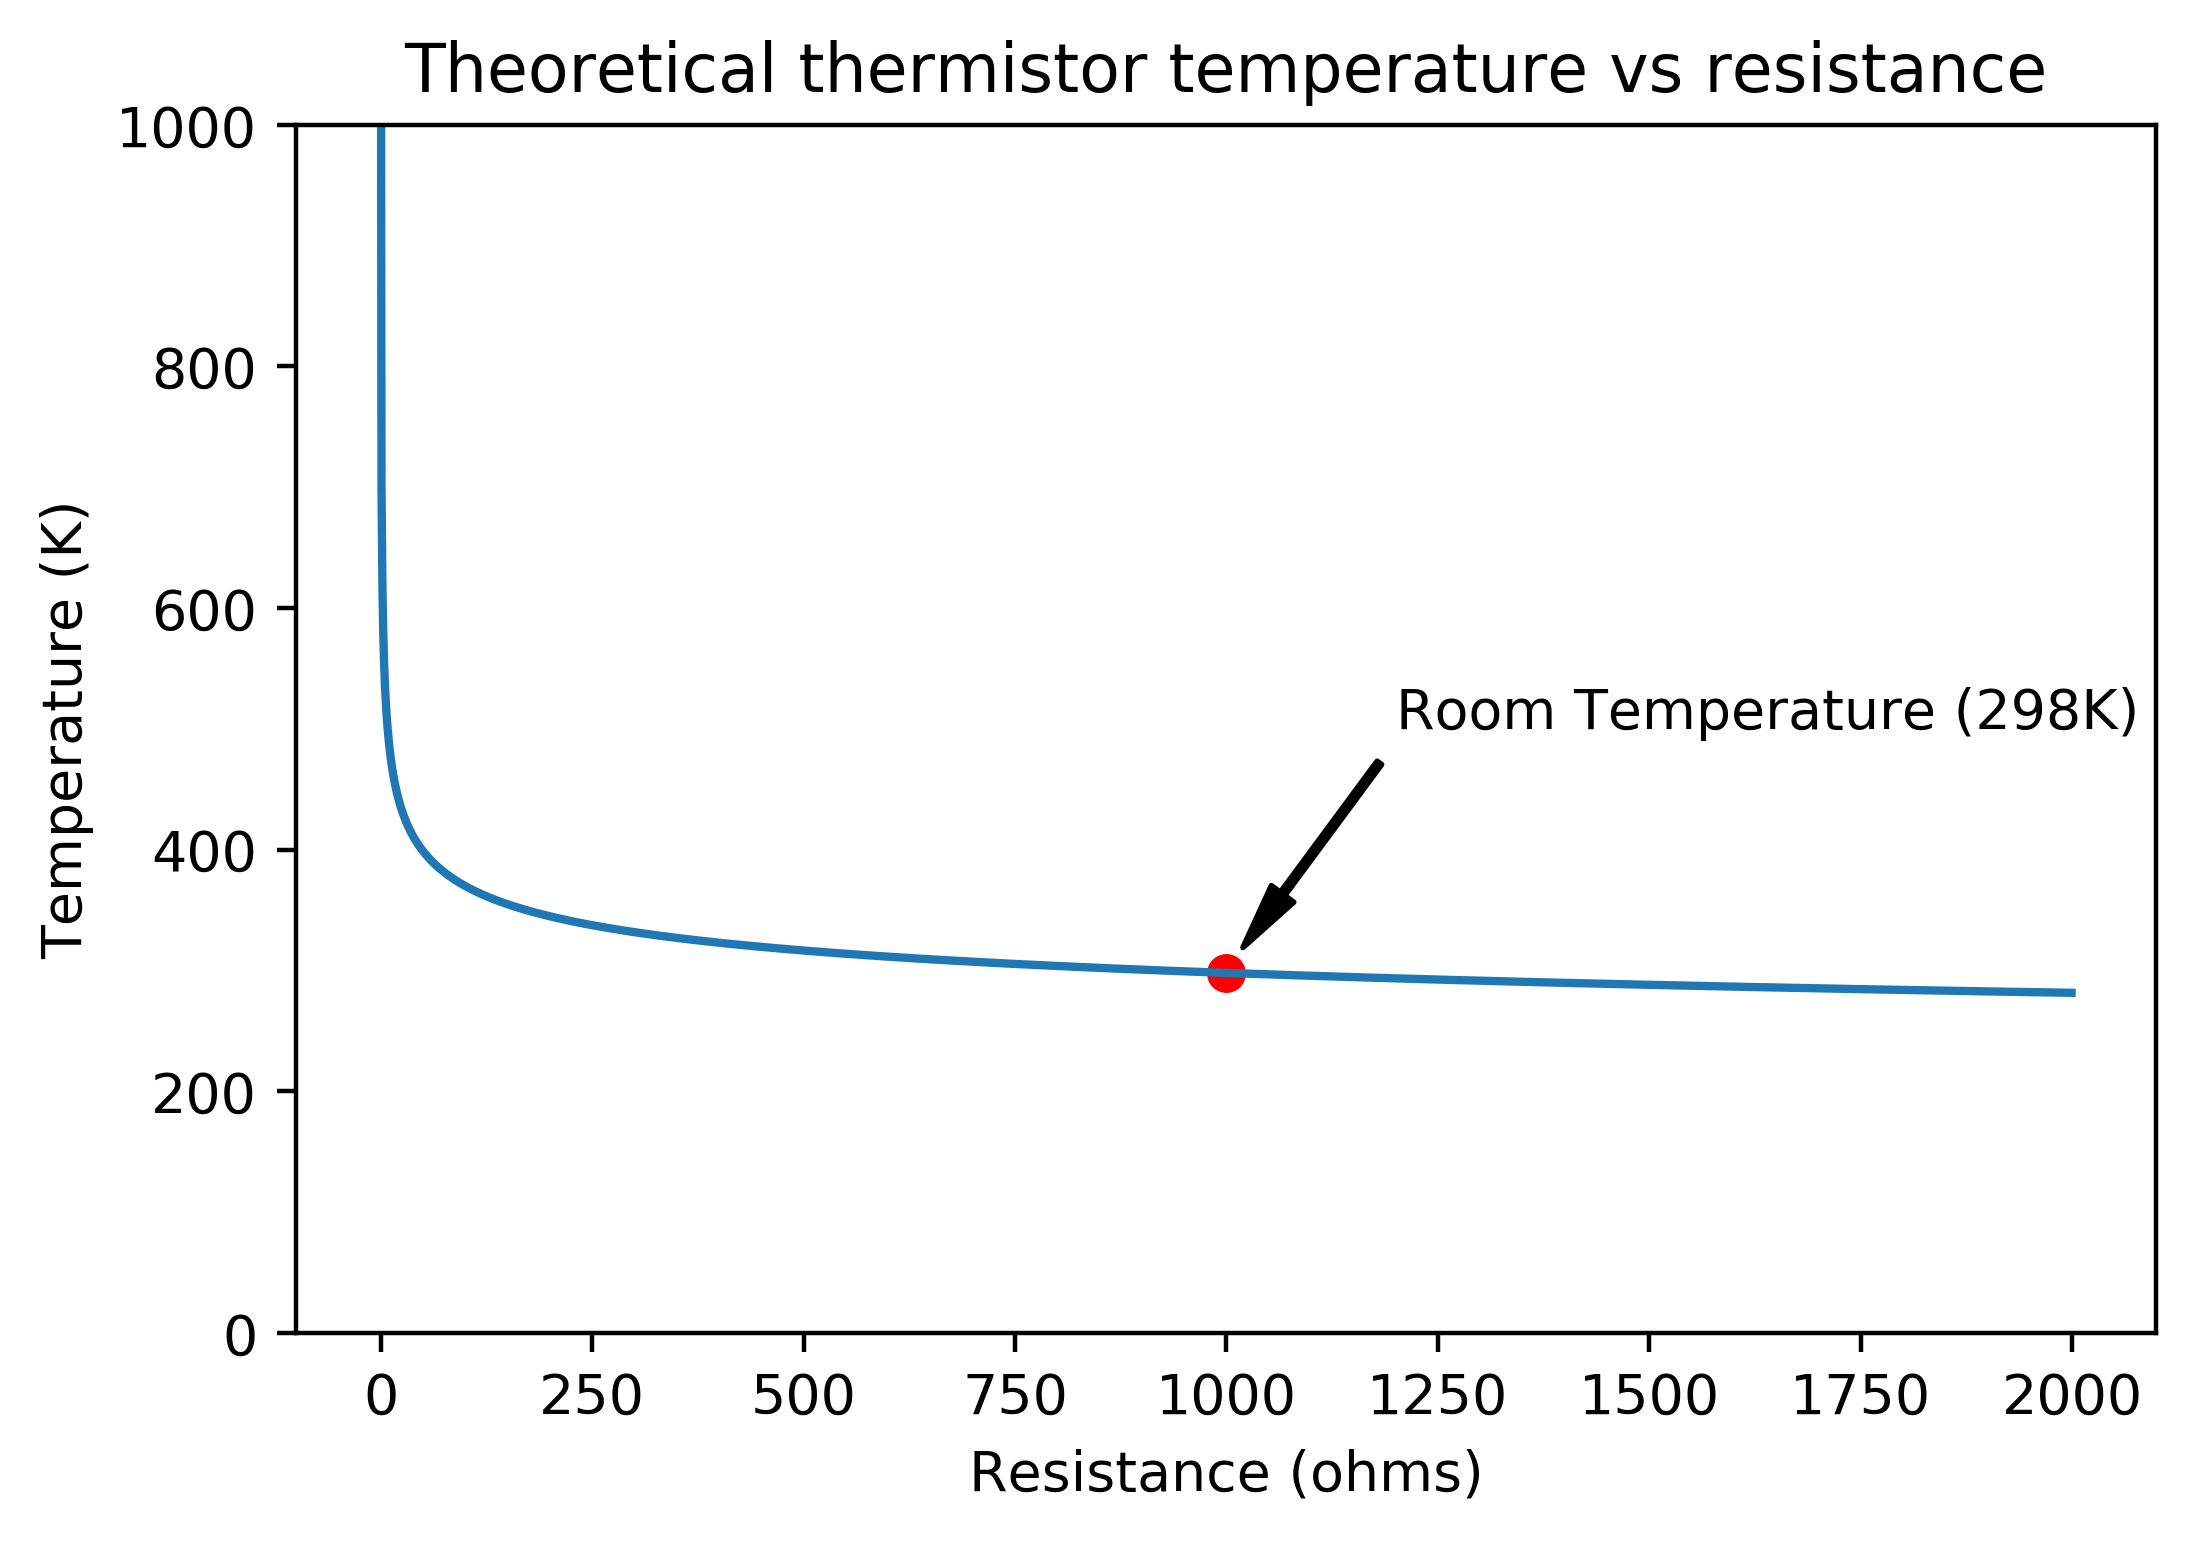

In [3]:
x = np.arange(0.1, 2000)

plt.figure(dpi = 400)
plt.plot(x, T(x))
plt.title("Theoretical thermistor temperature vs resistance")
plt.xlabel("Resistance (ohms)")
plt.ylabel("Temperature (K)")
plt.ylim(0, 1000)

# Show Room Temperature
plt.scatter([1000],[298], color = "red")
plt.gca().annotate('Room Temperature (298K)', xy=(1010, 310), xytext=(1200, 500),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
            )


### Great! Now we need to build the circuit to measure resistance

We can use a simple voltage divider circuit -- one fixed resistor and the thermistor. We can measure the voltage drop over either component to identify the resistance of the thermistor and post-process the data to determine the temperature.

![Circuit Diagram](circuit.png)


I set up two of these circuits; both to measure the temperature drop of hot coffee, but with one cup having ice dropped into it at a later time than the other cup.

Using the voltage divider method, we can use the measued potential drop to identify the current through the circuit. The current multiplied by the voltage difference of the voltage divider is equal to the resistance of the thermistor -- perfect to plug into our relationship from earlier.

In [4]:
# More imports

import pandas as pd
from scipy import stats

### Convert our formula above to explicit python

In [5]:
def raw_voltage_to_temperature(channel):
    voltage_thermo = channel
    current_circuit = (5 - voltage_thermo) / 1000
    thermisistor_resistance = voltage_thermo / current_circuit
    temp_kelvin = 1/(1/298 + np.log(thermisistor_resistance / 1000) / 3528)
    return temp_kelvin

### Load and process the data

In [6]:
file = "thermovoltvstime.csv"
data = pd.read_csv(file)

data.columns = ['Time', 'Channel 1', 'Channel 2']
data["Time"] = data["Time"]+ 599.85

data['Channel 1 Temperature (K)'] = raw_voltage_to_temperature(data['Channel 1'])
data['Channel 2 Temperature (K)'] = raw_voltage_to_temperature(data['Channel 2'])

### Plot the results

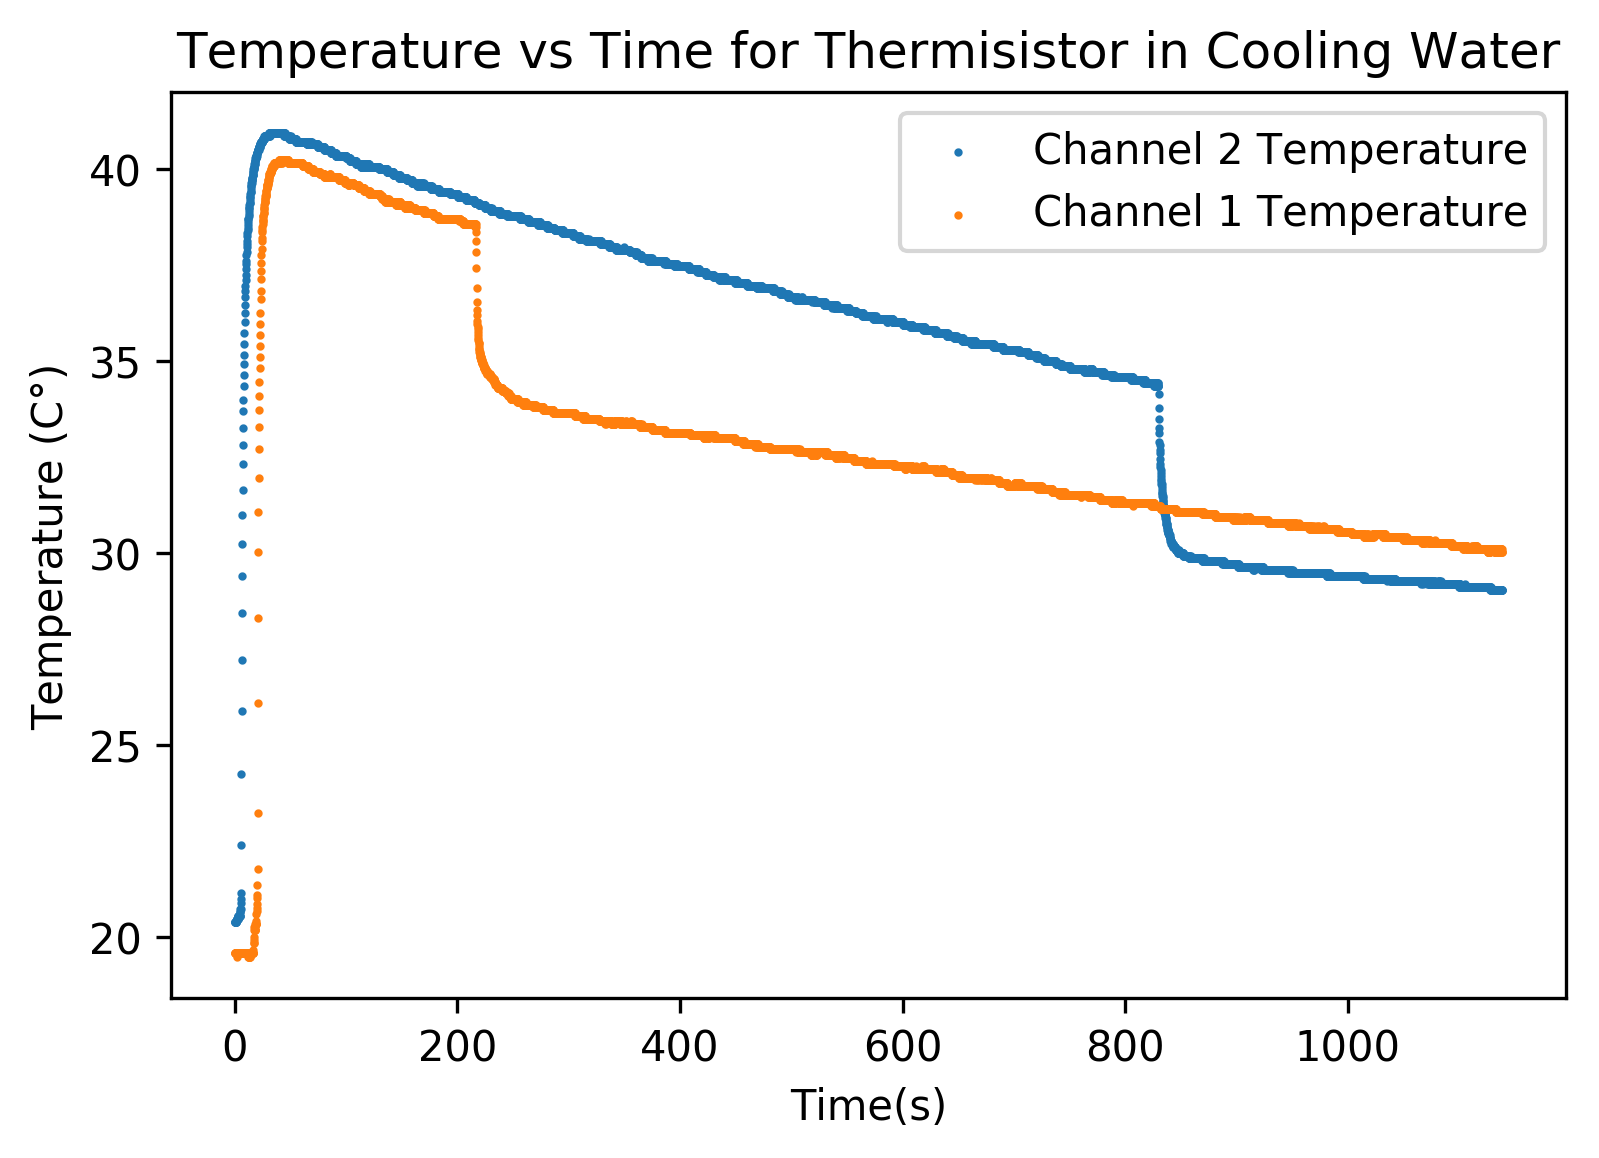

In [7]:
plt.figure(dpi = 300)

plt.scatter(data["Time"], data['Channel 2 Temperature (K)'] - 273 + 22, s=1, label="Channel 2 Temperature")
plt.scatter(data["Time"], data['Channel 1 Temperature (K)'] - 273 + 22, s=1, label="Channel 1 Temperature")

plt.title("Temperature vs Time for Thermisistor in Cooling Water")
plt.xlabel("Time(s)")
plt.ylabel("Temperature (C°)")
plt.legend()
plt.show()



## Beautiful!

We successfully measured and plotted the temperature vs time relationship of two cups of coffee cooling with additional ice.

Channel 1 represents the cup with ice added soon after being boiled. It rapidly drops temperature and continues to cool slowly.

Channel 2 represents the cup with ice added later after being boiled. It cools slowly then rapidly drops temperature, ending at an overall lower temperature despite having started at a slightly higher temperature than the other cup. 

We can conclude that if someone wants their cofffe to stay warm when they arrive at the office, they should add their milk as soon as possible.

### Fitting 

The rapid cooling of the "coffee" due to addition of the "milk" follows a common solution to a simple first order differential equation.

Expressed explicitly, this is given as:

$ T(t) = 22 C + (T( t = 0) - 22 C) e^{\frac{-t}{\tau}}$


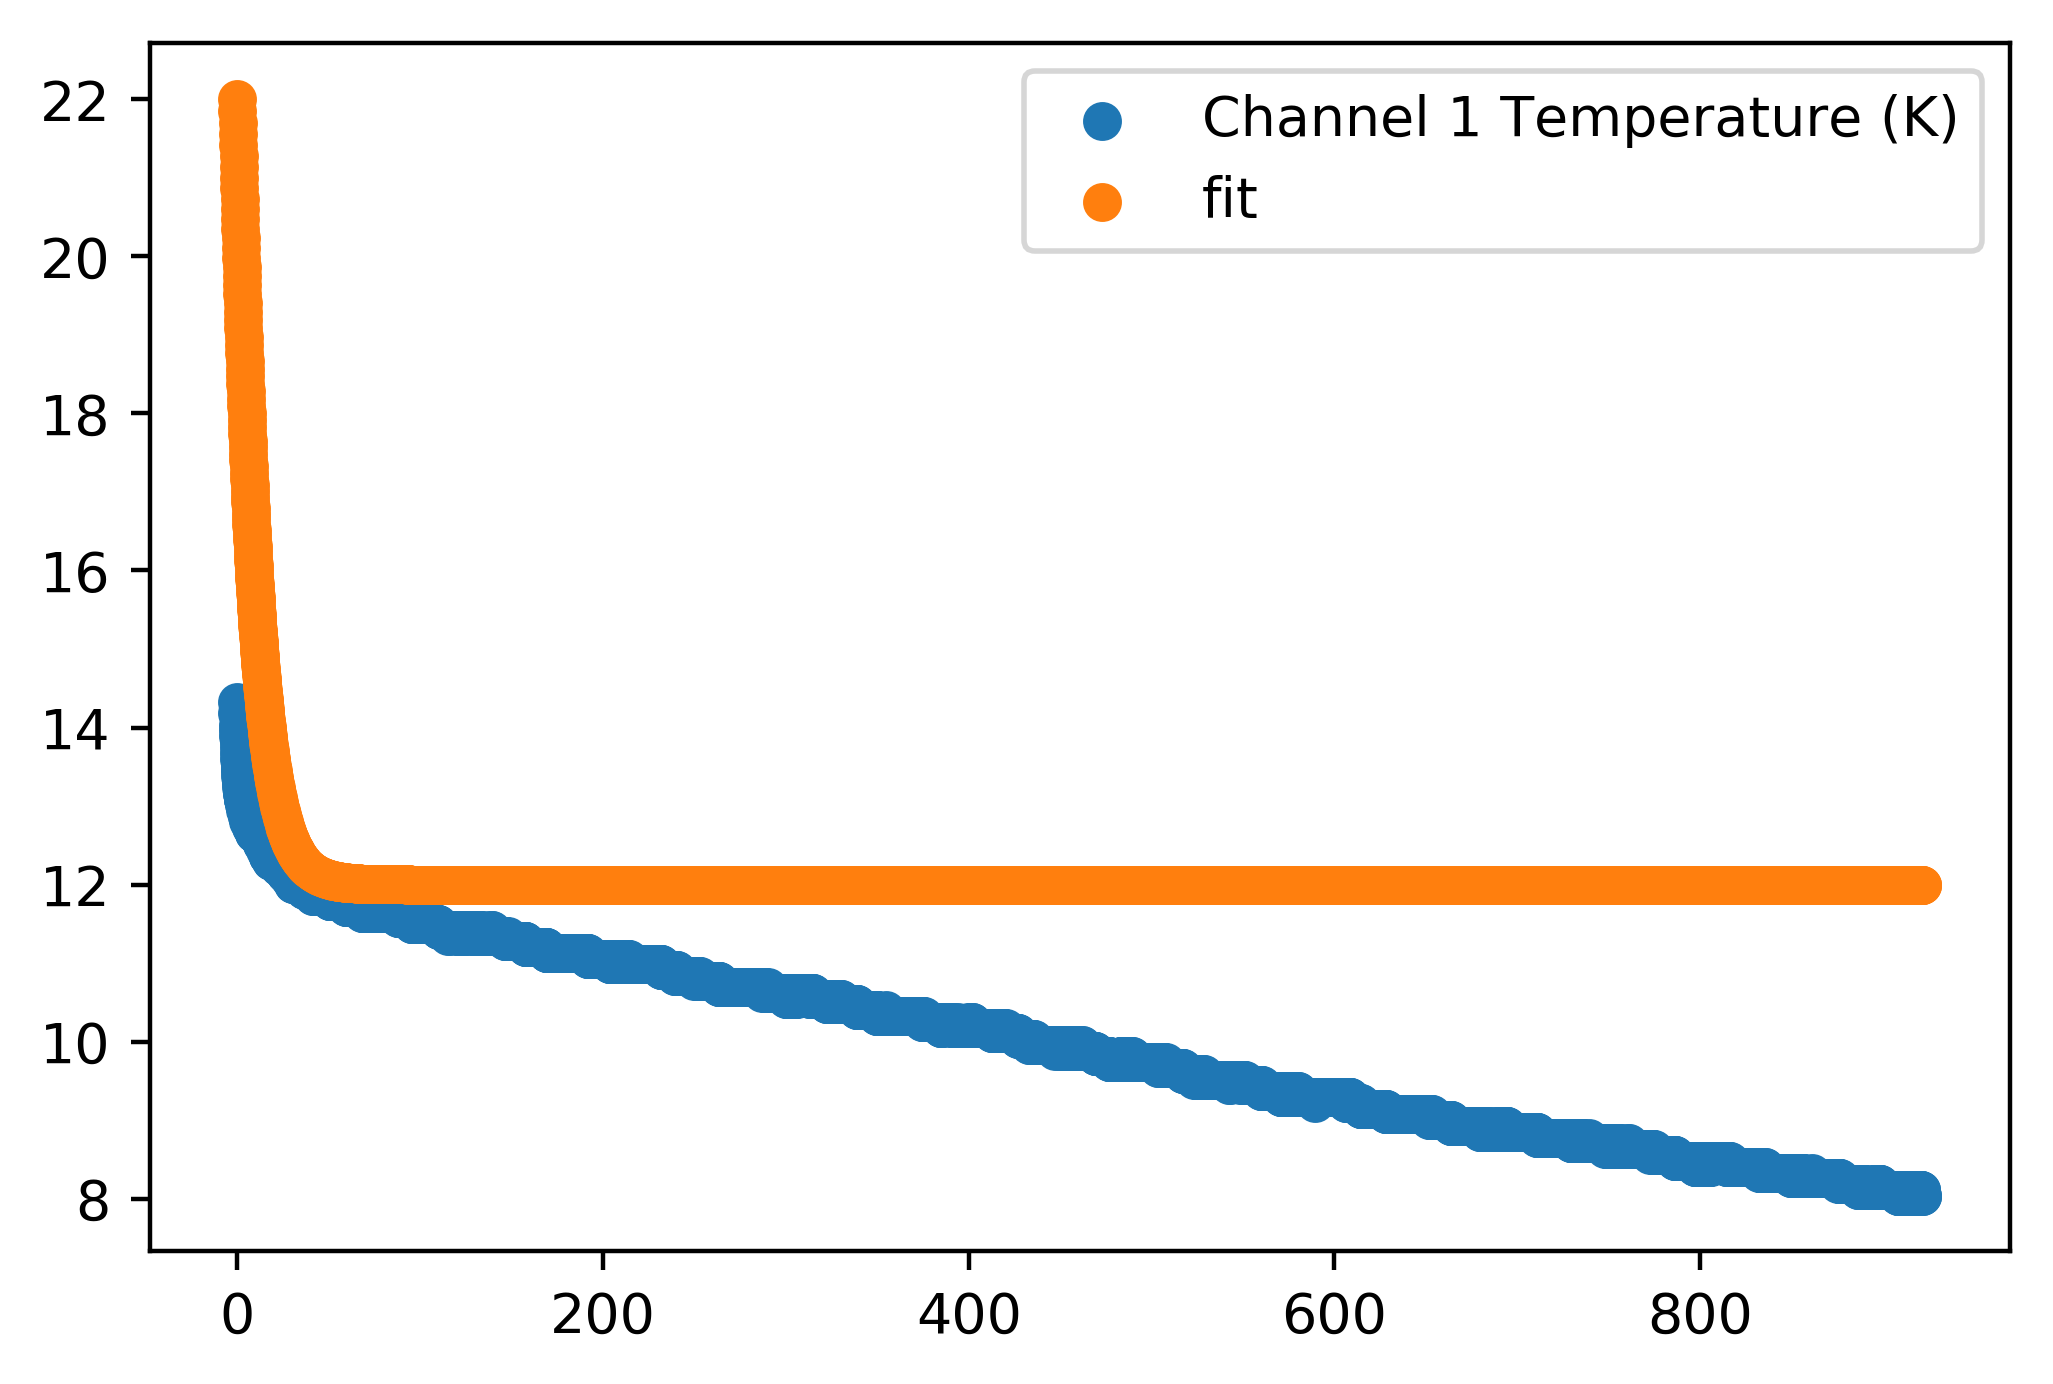

In [8]:
tau = 10
start = 1450
time = data["Time"][:-start]
new_data = data['Channel 1 Temperature (K)'][start:] - 273
channel1_fit = (np.e ** ( (-1 * time) / tau)) * (10) + 12

plt.figure(dpi=400)
plt.scatter(time, new_data, )
plt.scatter(time, channel1_fit, label='fit')
plt.legend()
plt.show()